# Burnout en empleados corporativos - Aprendizaje de Máquina - TP FINAL

---
## Análisis de Componentes Principales (PCA)
---

#### 1. Carga de datos

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [24]:
# Cargar de los datasets
X_train = pd.read_csv("output/burnout_X_train.csv")
y_train = pd.read_csv("output/burnout_y_train.csv")
X_test = pd.read_csv("output/burnout_X_test.csv")
y_test = pd.read_csv("output/burnout_y_test.csv")

#### 2. PCA - dataset con todas las features

In [25]:
X_train.shape, y_train.shape

((16853, 13), (16853, 1))

In [26]:
from sklearn.decomposition import PCA

# Aplicar PCA
pca = PCA(n_components=6)
components_all = pca.fit_transform(X_train) # Hacer PCA sobre el dataset de train

# Resultado como DataFrame para graficar o analizar
df_components_all = pd.DataFrame(components_all, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'], index=y_train.index)
df_components_all['BurnRate_Class'] = y_train.values

# Aplicar PCA al conjunto de test
components_test = pca.transform(X_test)

print(pca.explained_variance_ratio_)  # % de varianza capturada por cada componente

[0.58795479 0.09851714 0.09271049 0.03662683 0.02818557 0.02497256]


In [27]:
df_components_all.head()

,PC1,PC2,PC3,PC4,PC5,PC6,BurnRate_Class
0,1.041191,-1.714393,0.341711,0.143101,0.142379,0.276300,1.0
1,-2.820136,-0.437159,-1.162479,-0.687491,-0.205742,0.634680,0.0
2,1.046325,-1.075296,1.185162,-0.801379,-0.009905,0.041372,1.0
3,-2.774484,0.321384,-1.623802,-1.066568,0.759882,-0.088296,0.0
4,2.068310,0.730037,-1.750216,-0.380441,0.316608,-0.864610,2.0


#### 2. Gráfico de varianza explicada acumulada

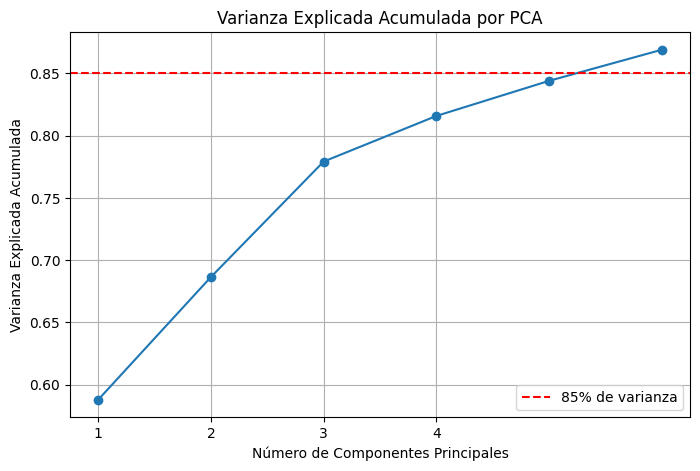

In [28]:
# Varianza explicada por componente
explained_variance = pca.explained_variance_ratio_

# varianza acumulada
cumulative_var = np.cumsum(explained_variance)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_var) + 1), cumulative_var, marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada por PCA')
plt.axhline(y=0.85, color='red', linestyle='--', label='85% de varianza')
plt.xticks([1, 2, 3,4])
plt.legend(loc='lower right')
plt.grid()
plt.show()

**Conclusión del gráfico de varianza acumulada**

El análisis de componentes principales (PCA) muestra que con 6 componentes se explica aproximadamente el 87% de la varianza total del dataset.
Dado que este valor supera el umbral establecido del 85%, se decide utilizar estas 6 componentes para generar un conjunto de datos reducido, que será empleado en el entrenamiento y evaluación de los modelos.

#### 3. Exportación del dataset de 6 componentes en .csv

In [29]:
# Convertir X (componentes PCA) a DataFrame
X_train_pca = pd.DataFrame(components_all, columns=[f'PC{i+1}' for i in range(6)])
X_test_pca = pd.DataFrame(components_test, columns=[f'PC{i+1}' for i in range(6)])

# Resetear index por si hay desalineación
X_train_pca.reset_index(drop=True, inplace=True)
X_test_pca.reset_index(drop=True, inplace=True)

# Exportar CSV
X_train_pca.to_csv('output/burnout_X_train_PCA.csv', index=False)
X_test_pca.to_csv('output/burnout_X_test_PCA.csv', index=False)